In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#!ls gdrive/MyDrive

In [ ]:
data_dir = 'gdrive/MyDrive/train'

In [ ]:
batch_size = 64
img_height = 180
img_width = 180

In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 1346 files belonging to 2 classes.
Using 1077 files for training.


In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 1346 files belonging to 2 classes.
Using 269 files for validation.


In [ ]:
class_names = val_ds.class_names
print(class_names)

['non_fire_images', 'train_fire']


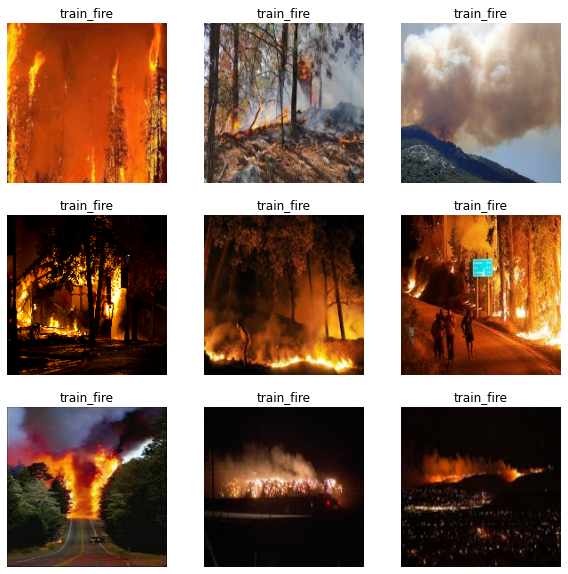

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(64, 180, 180, 3)
(64,)


In [ ]:
normalization_layer = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)

In [ ]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
print(np.min(first_image), np.max(first_image))

0.0 1.0


In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=7, activation='relu', input_shape=[180,180,3]))
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(units=256, activation='relu'))
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [ ]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 174, 174, 128)     18944     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 87, 87, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 85, 85, 64)        73792     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 42, 42, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 40, 40, 32)        18464     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 20, 20, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 12800)            

In [ ]:
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=5)

Epoch 1/5
17/17 [==============================] - 146s 8s/step - loss: 29.9339 - accuracy: 0.6917 - val_loss: 0.2787 - val_accuracy: 0.8885
Epoch 2/5
17/17 [==============================] - 135s 8s/step - loss: 0.3853 - accuracy: 0.8319 - val_loss: 0.2907 - val_accuracy: 0.8587
Epoch 3/5
17/17 [==============================] - 135s 8s/step - loss: 0.2986 - accuracy: 0.8700 - val_loss: 0.1185 - val_accuracy: 0.9591
Epoch 4/5
17/17 [==============================] - 135s 8s/step - loss: 0.1724 - accuracy: 0.9359 - val_loss: 0.4161 - val_accuracy: 0.8736
Epoch 5/5
17/17 [==============================] - 138s 8s/step - loss: 0.1560 - accuracy: 0.9359 - val_loss: 0.1157 - val_accuracy: 0.9591


In [ ]:
tf.keras.models.save_model(model, 'Forest_fire_detection_model.hdf5')